<a href="https://colab.research.google.com/github/Lokitha-S/project/blob/main/Copy_of_ODi2_o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('ODI Cricket Data new.csv')

In [ ]:
del df['team']

In [ ]:
del df['average']

In [ ]:
del df['strike_rate']

In [ ]:
del df['player_name']

In [ ]:
del df['percentage']

In [ ]:
df.head(2)

,role,total_runs,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards
0,Batter,13784,15031,7,681,671,579,579,0,360,219,41
1,Batter,11618,14634,0,0,0,510,510,0,237,273,26


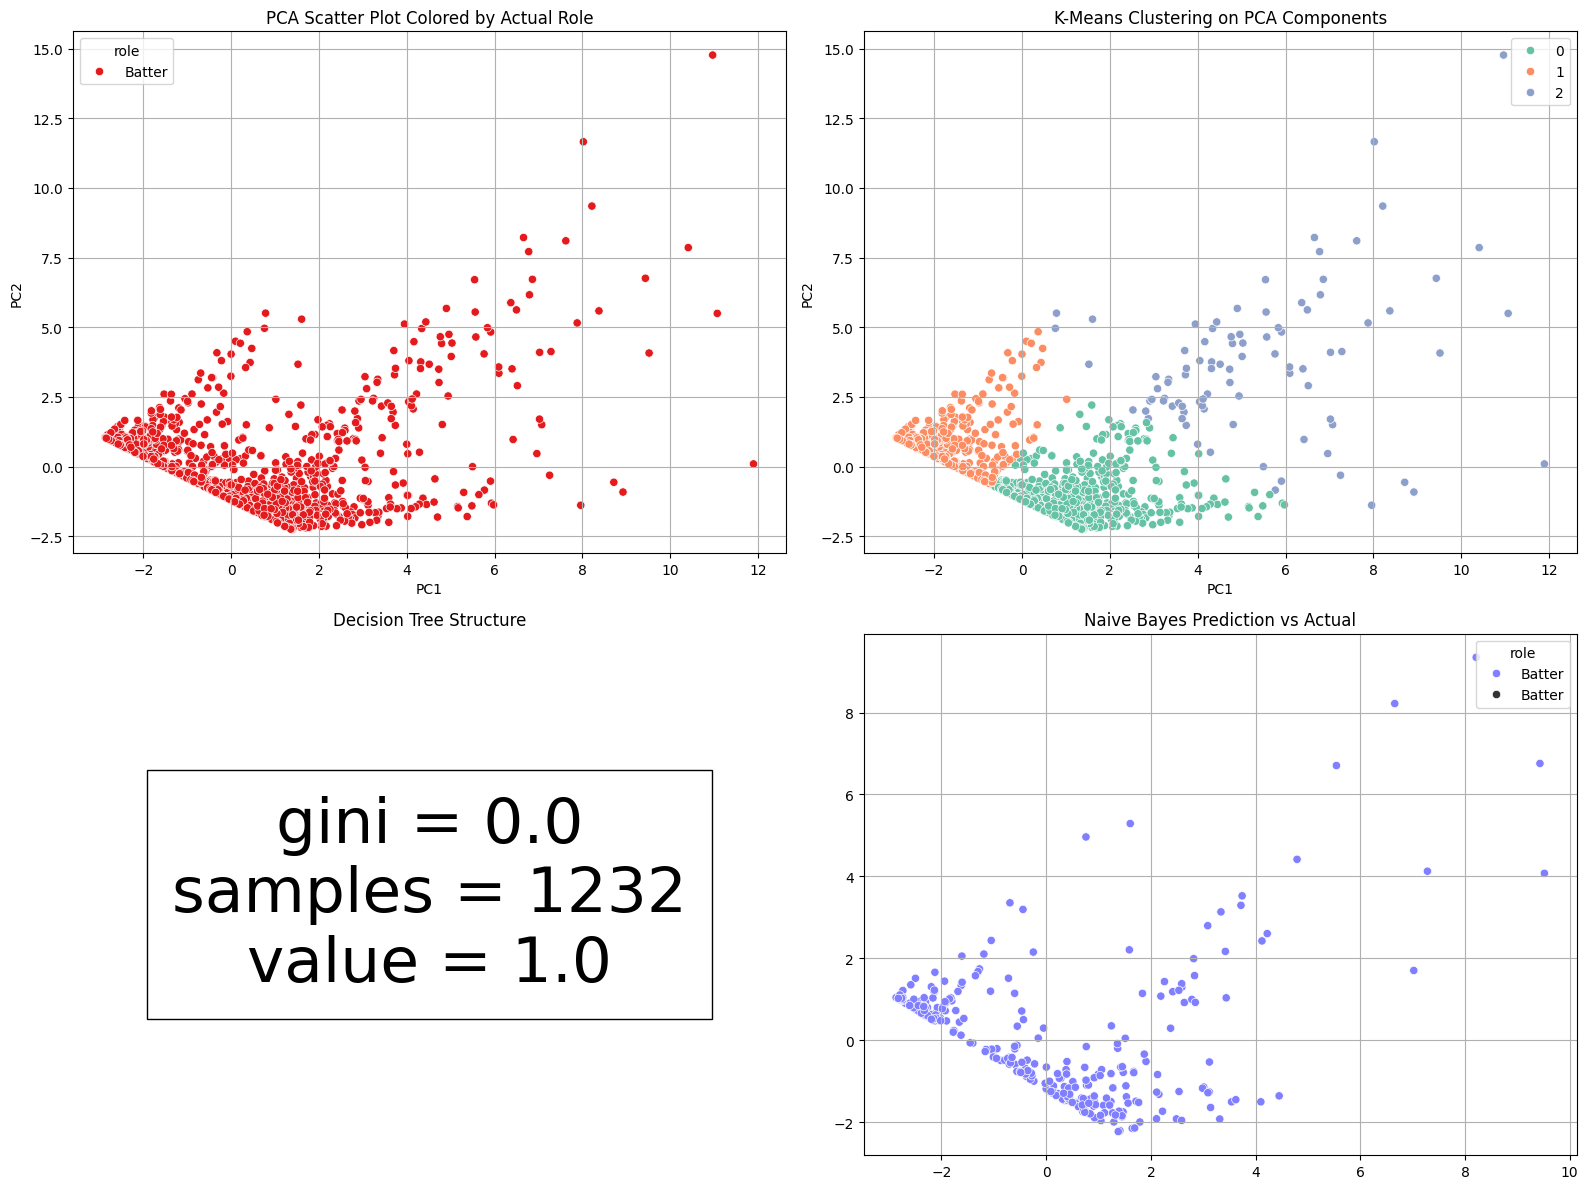

(1.0, 1.0, 1.0)

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Preprocessing
X = df.drop('role', axis=1)
y = df['role']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Train-test split for classifiers
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 1. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

# 2. Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# 3. KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

# 4. K-Means Clustering (Unsupervised)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Visualizations
plt.figure(figsize=(16, 12))

# PCA Components
plt.subplot(2, 2, 1)
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=y, palette='Set1')
plt.title('PCA Scatter Plot Colored by Actual Role')
plt.grid(True)

# K-Means Clustering
plt.subplot(2, 2, 2)
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=kmeans_labels, palette='Set2')
plt.title('K-Means Clustering on PCA Components')
plt.grid(True)

# Decision Tree Plot
plt.subplot(2, 2, 3)
plot_tree(dt_model, filled=True, feature_names=['PC1', 'PC2'], class_names=dt_model.classes_)
plt.title('Decision Tree Structure')

# Naive Bayes Predicted vs Actual
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=nb_preds, palette='cool', style=y_test)
plt.title('Naive Bayes Prediction vs Actual')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print metrics
nb_acc = accuracy_score(y_test, nb_preds)
dt_acc = accuracy_score(y_test, dt_preds)
knn_acc = accuracy_score(y_test, knn_preds)

(nb_acc, dt_acc, knn_acc)



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume df is already preprocessed
X = df.drop('role', axis=1)
y = df['role']

# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train models
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}
for model in models.values():
    model.fit(x_train_scaled, y_train)


ValueError: could not convert string to float: 'V Kohli'

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Binarize the target labels for ROC Curve (multiclass case)
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# ROC Curve for each classifier (Naive Bayes, Decision Tree, KNN)
# Predict probabilities
nb_probs = models['Naive Bayes'].predict_proba(x_test)
dt_probs = models['Decision Tree'].predict_proba(x_test)
knn_probs = models['KNN'].predict_proba(x_test)

# Initialize ROC Curve plots
plt.figure(figsize=(12, 6))
for probs, label in zip([nb_probs, dt_probs, knn_probs], ['Naive Bayes', 'Decision Tree', 'KNN']):
    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), probs.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Confusion Matrix Heatmap for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f'{name} Confusion Matrix')
plt.tight_layout()
plt.show()

# Scatter Plot of predicted values (PCA)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(x_scaled)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, model) in zip(axes, models.items()):
    preds = model.predict(x_scaled)
    sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=preds, palette='Set2', ax=ax, alpha=0.6)
    ax.set_title(f'{name} Prediction Scatter Plot')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
plt.tight_layout()
plt.show()

# Bar Graph of Accuracy Scores
accuracies = [accuracy_score(y_test, model.predict(x_test)) for model in models.values()]
plt.figure(figsize=(8, 5))
sns.barplot(x=list(models.keys()), y=accuracies, palette='viridis')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Pie Chart for Precision, Recall, F1-Score for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(x_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    metrics = [precision, recall, f1]
    labels = ['Precision', 'Recall', 'F1-Score']
    ax.pie(metrics, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax.set_title(f'{name} Metrics')
plt.tight_layout()
plt.show()


NameError: name 'models' is not defined

step 2


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Drop non-numeric and identifier columns
df_clean = df.drop(['player_name', 'team'], axis=1)

# Clean and convert corrupted numeric columns
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = (
            df_clean[col]
            .str.replace(r'[^0-9.]', '', regex=True)  # remove commas, %, etc.
            .replace('', np.nan)  # replace empty strings with NaN
            .astype(float)
        )

# Drop rows with NaNs
df_clean = df_clean.dropna()

# Separate features and label
X = df_clean.drop('role', axis=1)
y = df_clean['role']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA result
plt.figure(figsize=(8, 6))
for role in y.unique():
    idx = y == role
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=role)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('ODI Player Stats - PCA Visualization')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, roc_curve, auc, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64

# Load dataset
df = pd.read_csv('ODI Cricket Data new.csv')

# Preprocessing
# Remove identifier columns and problematic 'percentage' column
df = df.drop(['player_name', 'team', 'percentage'], axis=1)

# Encode categorical variable 'role' (Batter vs. Non-Batter)
le = LabelEncoder()
df['role'] = le.fit_transform(df['role'])  # 1 for Batter, 0 for Non-Batter

# Handle missing values (fill with 0 for simplicity, assuming missing stats are 0)
df = df.fillna(0)

# Define features and target
X = df.drop('role', axis=1)
y = df['role']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def clean_average(value):
    try:
        parts = str(value).split('.')
        if len(parts) > 1:
            cleaned = parts[0] + '.' + ''.join(parts[1:])
            return float(cleaned)
        return float(value)
    except (ValueError, TypeError):
        return 0.0

df['average'] = df['average'].apply(clean_average)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate classification models
results = {}
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'f1_score': f1, 'recall': recall, 'y_pred': y_pred}
    print(f"{name} Accuracy: {accuracy:.4f}")

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_pca)
cluster_labels = kmeans.predict(X_test_pca)
silhouette = silhouette_score(X_test_pca, cluster_labels)
print(f"K-Means Silhouette Score: {silhouette:.4f}")

# Select top 3 models based on accuracy
top_models = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)[:3]

# Function to convert plot to base64 for embedding
def plot_to_base64(fig):
    buf = BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    return img_str

# ROC Curves for top 3 models
plt.figure(figsize=(10, 6))
for name, result in top_models:
    if hasattr(models[name], 'predict_proba'):
        y_score = models[name].predict_proba(X_test_pca)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Top 3 Models')
plt.legend(loc='lower right')
roc_img = plot_to_base64(plt)
plt.close()

# Confusion Matrix Heatmaps
for name, result in top_models:
    cm = confusion_matrix(y_test, result['y_pred'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    cm_img = plot_to_base64(plt)
    plt.close()

# Scatter Plots for Predicted vs Actual
for name, result in top_models:
    plt.figure(figsize=(6, 4))
    plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual', alpha=0.5)
    plt.scatter(range(len(y_test)), result['y_pred'], c='red', label='Predicted', alpha=0.5)
    plt.title(f'Predicted vs Actual for {name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Role (0: Non-Batter, 1: Batter)')
    plt.legend()
    plt.tight_layout()
    scatter_img = plot_to_base64(plt)
    plt.close()

# Bar Chart for Metrics
metrics = ['accuracy', 'f1_score', 'recall']
model_names = [name for name, _ in top_models]
n_metrics = len(metrics)
n_models = len(model_names)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = np.arange(n_models)

for i, metric in enumerate(metrics):
    values = [results[name][metric] for name, _ in top_models]
    ax.bar(index + i * bar_width, values, bar_width, label=metric.capitalize())

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names)
ax.legend()
plt.tight_layout()
bar_img = plot_to_base64(plt)
plt.close()

# Print results
print("\nDetailed Results:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  F1-Score: {result['f1_score']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")

# Note: Visualizations are generated but not displayed in console. They are saved as base64 strings.
# To view, you can save them as images or use a plotting environment.

ValueError: could not convert string to float: '58.536.585.365.853.600'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, roc_curve, auc, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64

# Load dataset
df = pd.read_csv('ODI Cricket Data new.csv')

# Preprocessing
# Remove identifier columns and problematic 'percentage' column
df = df.drop(['player_name', 'team', 'percentage'], axis=1)
del df['strike_rate']

# Clean 'average' column: Remove extra periods and convert to float
def clean_average(value):
    try:
        parts = str(value).split('.')
        if len(parts) > 1:
            cleaned = parts[0] + '.' + ''.join(parts[1:])
            return float(cleaned)
        return float(value)
    except (ValueError, TypeError):
        return 0.0

df['average'] = df['average'].apply(clean_average)

# Encode categorical variable 'role' (Batter vs. Non-Batter)
le = LabelEncoder()
df['role'] = le.fit_transform(df['role'])  # 1 for Batter, 0 for Non-Batter

# Handle missing values (fill with 0)
df = df.fillna(0)

# Define features and target
X = df.drop('role', axis=1)
y = df['role']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate classification models
results = {}
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'f1_score': f1, 'recall': recall, 'y_pred': y_pred}
    print(f"{name} Accuracy: {accuracy:.4f}")

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_pca)
cluster_labels = kmeans.predict(X_test_pca)
silhouette = silhouette_score(X_test_pca, cluster_labels)
print(f"K-Means Silhouette Score: {silhouette:.4f}")

# Select top 3 models based on accuracy
top_models = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)[:3]

# Function to convert plot to base64 for embedding
def plot_to_base64(fig):
    buf = BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    return img_str

# ROC Curves for top 3 models
plt.figure(figsize=(10, 6))
for name, result in top_models:
    if hasattr(models[name], 'predict_proba'):
        y_score = models[name].predict_proba(X_test_pca)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Top 3 Models')
plt.legend(loc='lower right')
roc_img = plot_to_base64(plt)
plt.close()

# Confusion Matrix Heatmaps
for name, result in top_models:
    cm = confusion_matrix(y_test, result['y_pred'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    cm_img = plot_to_base64(plt)
    plt.close()

# Scatter Plots for Predicted vs Actual
for name, result in top_models:
    plt.figure(figsize=(6, 4))
    plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual', alpha=0.5)
    plt.scatter(range(len(y_test)), result['y_pred'], c='red', label='Predicted', alpha=0.5)
    plt.title(f'Predicted vs Actual for {name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Role (0: Non-Batter, 1: Batter)')
    plt.legend()
    plt.tight_layout()
    scatter_img = plot_to_base64(plt)
    plt.close()

# Bar Chart for Metrics
metrics = ['accuracy', 'f1_score', 'recall']
model_names = [name for name, _ in top_models]
n_metrics = len(metrics)
n_models = len(model_names)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = np.arange(n_models)

for i, metric in enumerate(metrics):
    values = [results[name][metric] for name, _ in top_models]
    ax.bar(index + i * bar_width, values, bar_width, label=metric.capitalize())

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names)
ax.legend()
plt.tight_layout()
bar_img = plot_to_base64(plt)
plt.close()

# Print results
print("\nDetailed Results:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  F1-Score: {result['f1_score']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")

# Note: Visualizations are saved as base64 strings and can be decoded to view images.

KNN Accuracy: 1.0000
Naive Bayes Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
K-Means Silhouette Score: 0.4360


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classifica

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 1000x600 with 0 Axes>

In [ ]:
df.head(2)

,role,total_runs,strike_rate,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards,average
0,0,13784,9.170.381.212.161.530,15031,7,681,671,579,579,0,360,219,41,1.969143
1,0,11618,7.939.046.057.127.230,14634,0,0,0,510,510,0,237,273,26,0.000000


KNN Accuracy: 1.0000
Naive Bayes Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
K-Means Silhouette Score: 0.4360
Skipping ROC for KNN: Only one class predicted
Skipping ROC for Naive Bayes: Only one class predicted
Skipping ROC for Decision Tree: Only one class predicted


<ipython-input-11-f0d636e404b6>:117: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pas

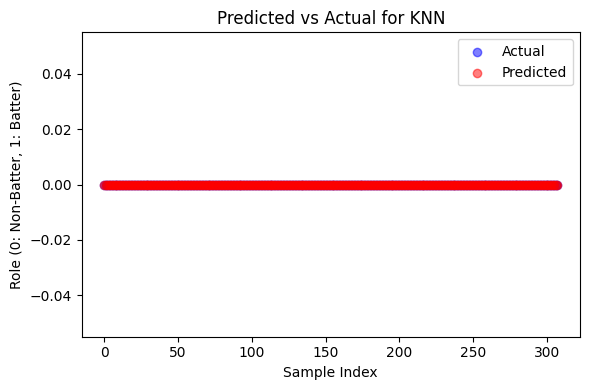

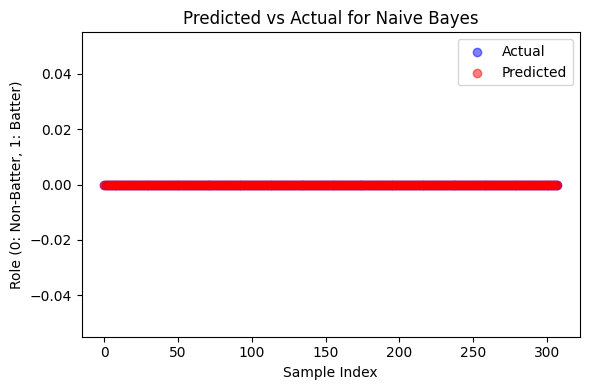

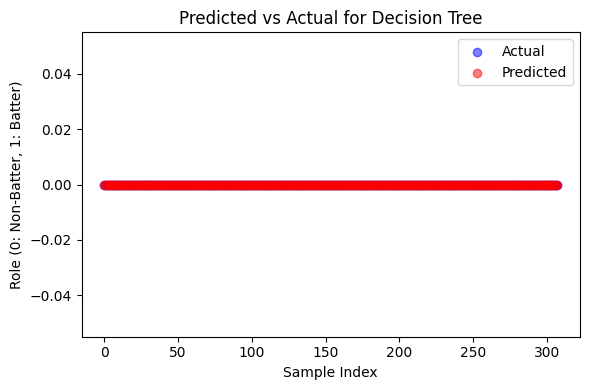


Detailed Results:
KNN:
  Accuracy: 1.0000
  F1-Score: 0.0000
  Recall: 0.0000
Naive Bayes:
  Accuracy: 1.0000
  F1-Score: 0.0000
  Recall: 0.0000
Decision Tree:
  Accuracy: 1.0000
  F1-Score: 0.0000
  Recall: 0.0000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, roc_curve, auc, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('ODI Cricket Data new.csv')

# Preprocessing
# Remove identifier columns and problematic 'percentage' column
df = df.drop(['player_name', 'team', 'percentage'], axis=1)

# Clean 'average' column: Remove extra periods and convert to float
def clean_average(value):
    try:
        parts = str(value).split('.')
        if len(parts) > 1:
            cleaned = parts[0] + '.' + ''.join(parts[1:])
            return float(cleaned)
        return float(value)
    except (ValueError, TypeError):
        return 0.0

df['average'] = df['average'].apply(clean_average)

# Encode categorical variable 'role' (Batter vs. Non-Batter)
le = LabelEncoder()
df['role'] = le.fit_transform(df['role'])  # 1 for Batter, 0 for Non-Batter

# Handle missing values (fill with 0)
df = df.fillna(0)
del df['strike_rate']


# Define features and target
X = df.drop('role', axis=1)
y = df['role']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate classification models
results = {}
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    results[name] = {'accuracy': accuracy, 'f1_score': f1, 'recall': recall, 'y_pred': y_pred}
    print(f"{name} Accuracy: {accuracy:.4f}")

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_pca)
cluster_labels = kmeans.predict(X_test_pca)
silhouette = silhouette_score(X_test_pca, cluster_labels)
print(f"K-Means Silhouette Score: {silhouette:.4f}")

# Select top 3 models based on accuracy
top_models = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)[:3]

# Function to convert plot to base64 for embedding
def plot_to_base64(fig):
    buf = BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    return img_str

# ROC Curves for top 3 models
plt.figure(figsize=(10, 6))
for name, result in top_models:
    if hasattr(models[name], 'predict_proba'):
        try:
            y_score = models[name].predict_proba(X_test_pca)
            # Check if y_score has two columns (for binary classification)
            if y_score.shape[1] == 2:
                y_score = y_score[:, 1]  # Probability for positive class
                fpr, tpr, _ = roc_curve(y_test, y_score)
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
            else:
                print(f"Skipping ROC for {name}: Only one class predicted")
        except IndexError:
            print(f"Skipping ROC for {name}: IndexError in predict_proba")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Top 3 Models')
plt.legend(loc='lower right')
roc_img = plot_to_base64(plt)
plt.close()

# Confusion Matrix Heatmaps
for name, result in top_models:
    cm = confusion_matrix(y_test, result['y_pred'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    cm_img = plot_to_base64(plt)
    plt.close()

# Scatter Plots for Predicted vs Actual
for name, result in top_models:
    plt.figure(figsize=(6, 4))
    plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual', alpha=0.5)
    plt.scatter(range(len(y_test)), result['y_pred'], c='red', label='Predicted', alpha=0.5)
    plt.title(f'Predicted vs Actual for {name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Role (0: Non-Batter, 1: Batter)')
    plt.legend()
    plt.tight_layout()
    scatter_img = plot_to_base64(plt)
    plt.show()

# Bar Chart for Metrics
metrics = ['accuracy', 'f1_score', 'recall']
model_names = [name for name, _ in top_models]
n_metrics = len(metrics)
n_models = len(model_names)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = np.arange(n_models)

for i, metric in enumerate(metrics):
    values = [results[name][metric] for name, _ in top_models]
    ax.bar(index + i * bar_width, values, bar_width, label=metric.capitalize())

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names)
ax.legend()
plt.tight_layout()

# Convert bar chart to Chart.js format
bar_chart_config = {
    "type": "bar",
    "data": {
        "labels": model_names,
        "datasets": [
            {
                "label": "Accuracy",
                "data": [results[name]['accuracy'] for name, _ in top_models],
                "backgroundColor": "rgba(54, 162, 235, 0.6)",
                "borderColor": "rgba(54, 162, 235, 1)",
                "borderWidth": 1
            },
            {
                "label": "F1-Score",
                "data": [results[name]['f1_score'] for name, _ in top_models],
                "backgroundColor": "rgba(255, 99, 132, 0.6)",
                "borderColor": "rgba(255, 99, 132, 1)",
                "borderWidth": 1
            },
            {
                "label": "Recall",
                "data": [results[name]['recall'] for name, _ in top_models],
                "backgroundColor": "rgba(75, 192, 192, 0.6)",
                "borderColor": "rgba(75, 192, 192, 1)",
                "borderWidth": 1
            }
        ]
    },
    "options": {
        "scales": {
            "x": {
                "title": {
                    "display": True,
                    "text": "Models"
                }
            },
            "y": {
                "title": {
                    "display": True,
                    "text": "Scores"
                },
                "beginAtZero": True
            }
        },
        "plugins": {
            "title": {
                "display": True,
                "text": "Model Performance Comparison"
            },
            "legend": {
                "display": True,
                "position": "top"
            }
        }
    }
}
bar_img = plot_to_base64(plt)
plt.close()

# Print results
print("\nDetailed Results:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  F1-Score: {result['f1_score']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")

# Note: Visualizations are saved as base64 strings and can be decoded to view images.